# Import Libraries

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Data Wrangling

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Direktori Kiara
df = pd.read_csv('/content/drive/MyDrive/Dataset/hotels.csv')

# Direktori Alviya
#df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/Dataset/hotels.csv')

In [5]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Data Cleaning

In [8]:
duplicates = df.duplicated().sum()
print(f"Banyak kolom duplikat sebelum cleaning: {duplicates}")

Banyak kolom duplikat sebelum cleaning: 31994


In [9]:
df_cleaned = df.drop_duplicates()

In [10]:
drop_duplicates = df_cleaned.duplicated().sum()
print(f"Banyak kolom duplikat setelah cleaning: {drop_duplicates}")

Banyak kolom duplikat setelah cleaning: 0


In [11]:
null_data = df.isnull().sum()
print(f"Banyak missing value sebelum cleaning: {null_data}")

Banyak missing value sebelum cleaning: hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent             

In [12]:
numeric_columns = df_cleaned.select_dtypes(include='number').columns
categorical_columns = df_cleaned.select_dtypes(include='object').columns

In [13]:
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna(df_cleaned[categorical_columns].mode().iloc[0])

In [14]:
print("\nBanyak missing value sebelum cleaning:")
print(df_cleaned.isnull().sum())


Banyak missing value sebelum cleaning:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type           

In [15]:
print("\nPreview data clean:")
df_cleaned.head()


Preview data clean:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,94.138306,183.081384,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,94.138306,183.081384,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,94.138306,183.081384,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,183.081384,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,183.081384,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Explanatory Data Analysis

In [16]:
palette = ['#ADD8E6', '#FFC0CB']

In [17]:
df = df_cleaned

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.00000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.13864,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.45587,0.113597,0.193775,0.369145,1.731894,0.727245,104.995926,32.023528,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,183.081384,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,183.081384,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,183.081384,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.00000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [19]:
df[categorical_columns]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


## Distribusi Tipe Customer

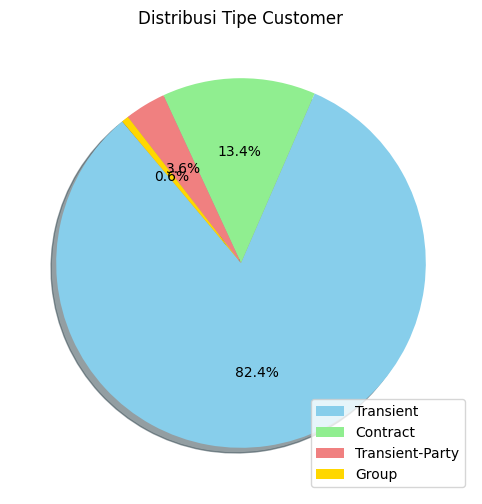

In [20]:
customer_type_counts = df['customer_type'].value_counts()

colors = {
    'Transient': 'skyblue',
    'Contract': 'lightcoral',
    'Transient-Party': 'lightgreen',
    'Group': 'gold'
}

labels = ['Transient', 'Contract', 'Transient-Party', 'Group']


# Visualisasi
plt.figure(figsize=(8, 6))
plt.pie(
    customer_type_counts.values,
    colors=[colors[key] for key in customer_type_counts.index],
    autopct='%1.1f%%',
    startangle=130,
    shadow=True
)

plt.title('Distribusi Tipe Customer')
plt.legend(labels)
plt.show()

## Pendapatan Pertahun dari Kedua Tipe Hotel

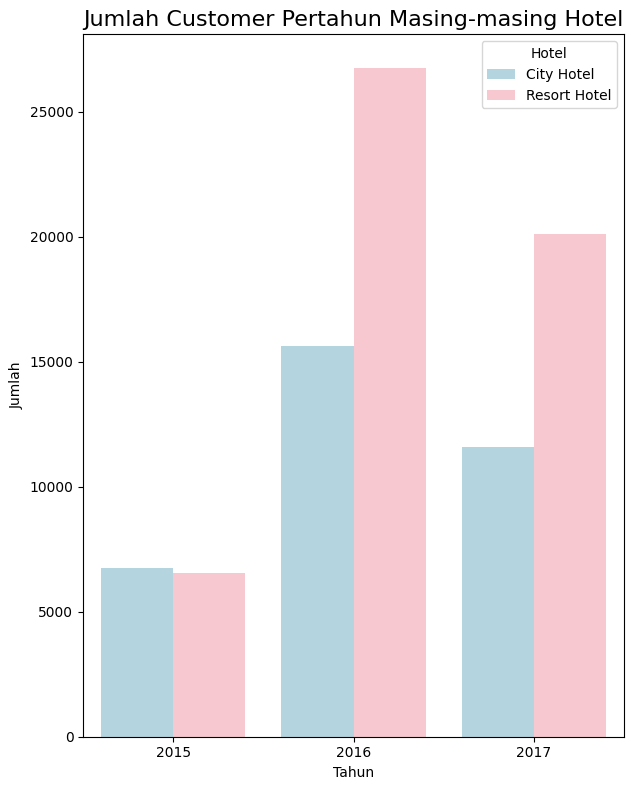

In [21]:
# Visualisasi barchart menggunakan data dari dataframe
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)

#Disini kita menggunakan data arrival date year sebagai variabel x dan variabel hotel sebagai hue supaya data tervisualisasi berdasarkan tipe hotel
sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette=palette)
plt.title("Jumlah Customer Pertahun Masing-masing Hotel", size=16)

plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.legend(title="Hotel", loc="upper right", labels=['City Hotel', 'Resort Hotel'])

plt.tight_layout()
plt.show()


Pendapatan resort hotel selama tiga tahun berturut - turut lebih tinggi daripada city hotel dengan puncak tertingginya pada tahun 2016. Untuk mengetahui lebih lanjut, kita akan menganalisa tipe customer manakah yang paling banyak memberikan kontribusi terhadap pendapatan hotel. Supaya lebih rinci, kita akan melakukan analisa pada resort hotel terlebih dahulu.

In [22]:
customer_resort = df[df['hotel']=='Resort Hotel']

In [23]:
print(customer_resort['adr'].describe())

count    33968.000000
mean        99.025346
std         63.766782
min         -6.380000
25%         51.392500
50%         79.500000
75%        134.000000
max        508.000000
Name: adr, dtype: float64


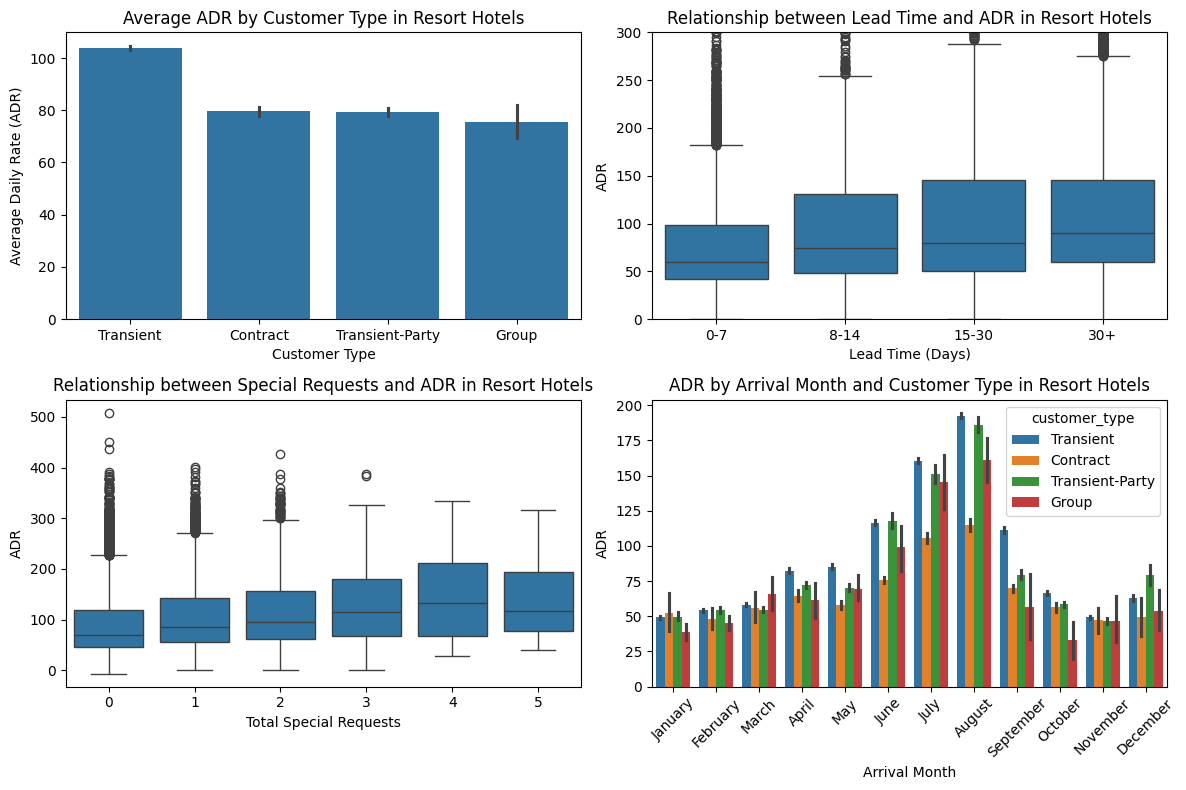

In [24]:
# Mengelompokkan data berdasarkan jenis pelanggan dan hitung ADR rata-rata untuk setiap jenis
customer_type_adr = customer_resort.groupby('customer_type')['adr'].mean().reset_index()

# Create bins for lead time
customer_resort['lead_time_bin'] = pd.cut(customer_resort['lead_time'], bins=[0, 7, 14, 30, np.inf], labels=['0-7', '8-14', '15-30', '30+'])

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Average ADR by Customer Type
sns.barplot(x='customer_type', y='adr', data=customer_resort, ax=axes[0, 0])
axes[0, 0].set_title('Average ADR by Customer Type in Resort Hotels')
axes[0, 0].set_xlabel('Customer Type')
axes[0, 0].set_ylabel('Average Daily Rate (ADR)')

# Plot 2: Relationship between Lead Time and ADR
sns.boxplot(x='lead_time_bin', y='adr', data=customer_resort, ax=axes[0, 1]) # Use customer_resort with lead_time_bin column
axes[0, 1].set_title('Relationship between Lead Time and ADR in Resort Hotels')
axes[0, 1].set_xlabel('Lead Time (Days)')
axes[0, 1].set_ylabel('ADR')
axes[0, 1].set_ylim(0, 300)

# Plot 3: Relationship between Special Requests and ADR
sns.boxplot(x='total_of_special_requests', y='adr', data=customer_resort,  ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Special Requests and ADR in Resort Hotels')
axes[1, 0].set_xlabel('Total Special Requests')
axes[1, 0].set_ylabel('ADR')
axes[0, 1].set_ylim(0, 300)

# Plot 4: ADR by Arrival Month and Customer Type
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
sns.barplot(x='arrival_date_month', y='adr', hue='customer_type', data=customer_resort, order=months_order, ax=axes[1, 1])
axes[1, 1].set_title('ADR by Arrival Month and Customer Type in Resort Hotels')
axes[1, 1].set_xlabel('Arrival Month')
axes[1, 1].set_ylabel('ADR')
axes[1, 1].tick_params(axis='x', rotation=45)

# Mengatur tata letak agar tidak saling bertumpuk
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

Berdasarkan analisis keempat grafik untuk Resort Hotels, dapat diidentifikasi beberapa pola yang berbeda dengan City Hotels. Pada grafik pertama, segmen Transient tetap mendominasi dengan ADR tertinggi, namun terdapat perbedaan yang lebih signifikan dengan segmen lainnya, dimana Contract menempati posisi kedua, diikuti Transient-Party dan Group. Analisis lead time pada grafik kedua menunjukkan tren peningkatan ADR seiring bertambahnya waktu pemesanan, dengan median ADR yang lebih tinggi pada pemesanan 15-30 hari dan 30+ hari sebelum kedatangan. Grafik ketiga memperlihatkan korelasi positif yang lebih kuat antara jumlah special request dengan ADR, dengan outlier yang mencapai ADR 500, mengindikasikan variasi harga yang lebih lebar di resort hotels. Sementara itu, pola seasonal pada grafik keempat menunjukkan perbedaan yang sangat signifikan, dimana puncak ADR terjadi pada periode Juli-Agustus dengan nilai hampir mencapai 200, jauh lebih tinggi dibanding bulan-bulan lainnya, hal ini mencerminkan karakteristik resort yang sangat dipengaruhi oleh musim liburan.

Selain melakukan analisa pada resort hotel, kita akan melakukan analisa pada city hotel

In [25]:
customer_city = df[df['hotel']=='City Hotel']

In [26]:
print(customer_city['adr'].describe())

count    53428.000000
mean       110.985944
std         48.062518
min          0.000000
25%         84.000000
50%        105.300000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64


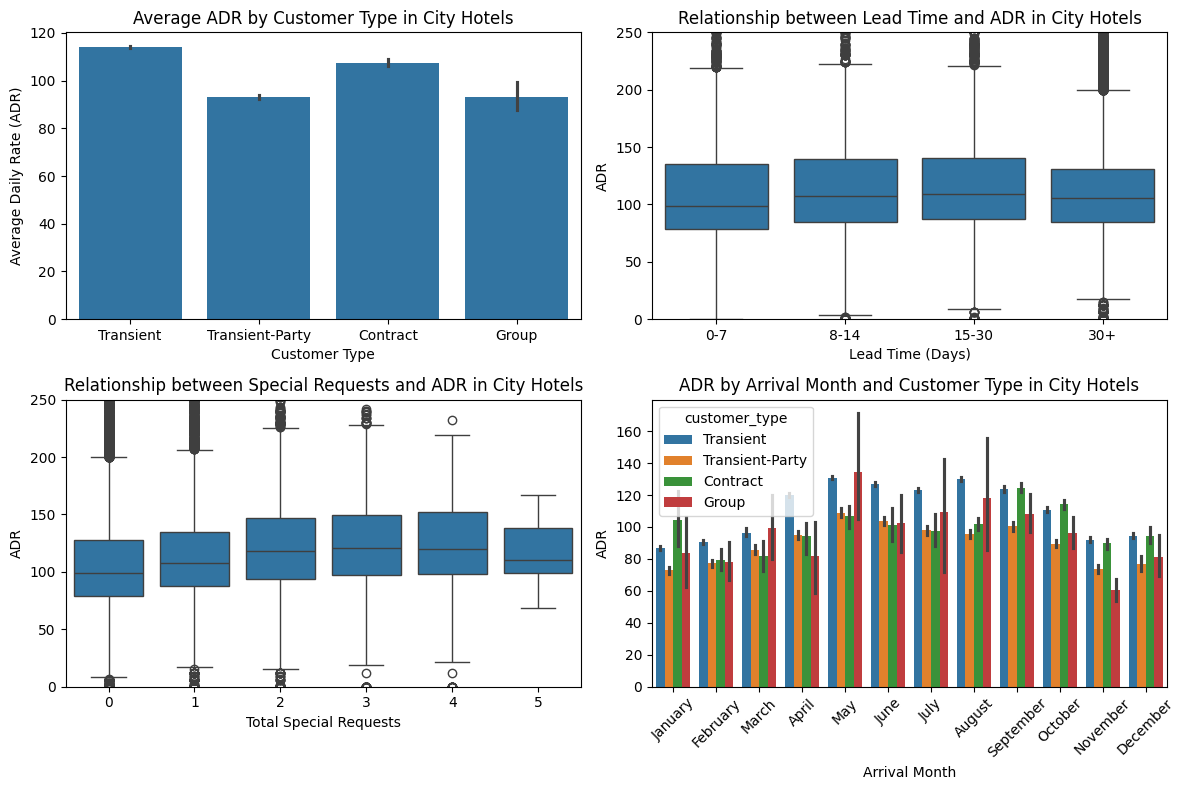

In [27]:
# Mengelompokkan data berdasarkan jenis pelanggan dan hitung ADR rata-rata untuk setiap jenis
customer_type_adr = customer_city.groupby('customer_type')['adr'].mean().reset_index()

# Create bins for lead time
customer_city['lead_time_bin_city'] = pd.cut(customer_city['lead_time'], bins=[0, 7, 14, 30, np.inf], labels=['0-7', '8-14', '15-30', '30+'])

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Average ADR by Customer Type
sns.barplot(x='customer_type', y='adr', data=customer_city, ax=axes[0, 0])
axes[0, 0].set_title('Average ADR by Customer Type in City Hotels')
axes[0, 0].set_xlabel('Customer Type')
axes[0, 0].set_ylabel('Average Daily Rate (ADR)')

# Plot 2: Relationship between Lead Time and ADR
sns.boxplot(x='lead_time_bin_city', y='adr', data=customer_city, ax=axes[0, 1])
axes[0, 1].set_title('Relationship between Lead Time and ADR in City Hotels')
axes[0, 1].set_xlabel('Lead Time (Days)')
axes[0, 1].set_ylabel('ADR')
axes[0, 1].set_ylim(0, 250)  # Membatasi y-axis sampai 250

# Plot 3: Relationship between Special Requests and ADR
sns.boxplot(x='total_of_special_requests', y='adr', data=customer_city, ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Special Requests and ADR in City Hotels')
axes[1, 0].set_xlabel('Total Special Requests')
axes[1, 0].set_ylabel('ADR')
axes[1, 0].set_ylim(0, 250)  # Membatasi y-axis sampai 250

# Plot 4: ADR by Arrival Month and Customer Type
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
sns.barplot(x='arrival_date_month', y='adr', hue='customer_type', data=customer_city, order=months_order, ax=axes[1, 1])
axes[1, 1].set_title('ADR by Arrival Month and Customer Type in City Hotels')
axes[1, 1].set_xlabel('Arrival Month')
axes[1, 1].set_ylabel('ADR')
axes[1, 1].tick_params(axis='x', rotation=45)

# Mengatur tata letak agar tidak saling bertumpuk
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

Berdasarkan analisis dari keempat grafik pada city hotel, dapat diidentifikasi beberapa pola signifikan dalam pengelolaan hotel. Grafik pertama menunjukkan bahwa segmen Transient memiliki ADR tertinggi dibandingkan segmen lainnya, mengindikasikan kontribusi pendapatan yang lebih substansial dari tamu individual. Analisis hubungan antara lead time dengan ADR pada grafik kedua menunjukkan distribusi yang relatif stabil, meskipun terdapat beberapa outlier yang mencapai ADR 250, menandakan adanya kasus-kasus khusus dalam penetapan harga. Selanjutnya, grafik ketiga memperlihatkan korelasi positif antara jumlah special request dengan ADR, dimana peningkatan jumlah permintaan khusus berbanding lurus dengan tingkat ADR - hal ini mengindikasikan hubungan antara ekspektasi layanan dengan kesediaan membayar dari tamu. Pada grafik terakhir, terlihat pola seasonal yang jelas dimana ADR mencapai puncaknya pada periode Mei hingga September, dengan segmen Transient secara konsisten mempertahankan posisi ADR tertinggi di hampir setiap bulan, memberikan implikasi penting untuk strategi penetapan harga dan manajemen pendapatan hotel.

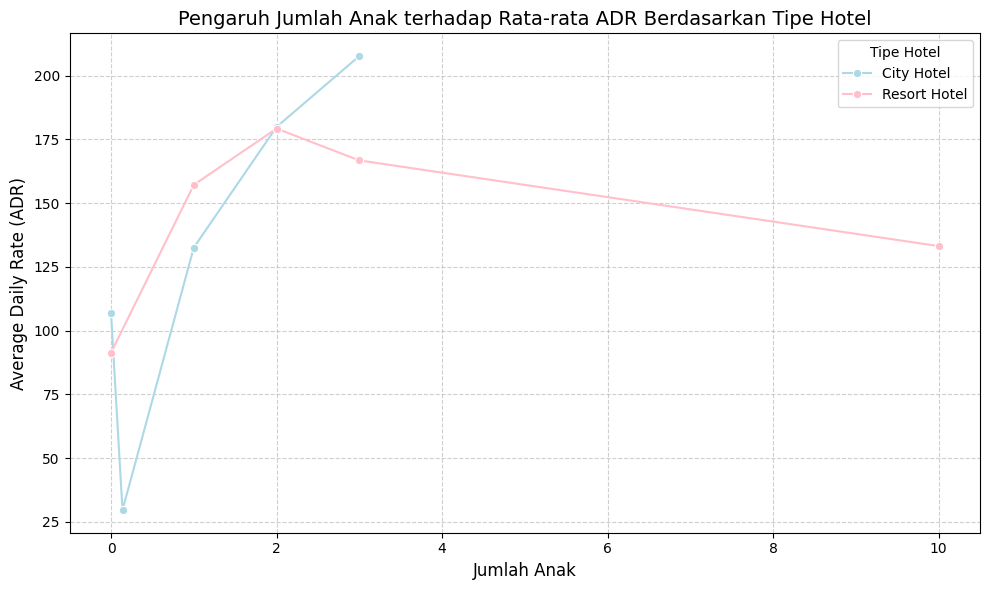

In [28]:
# Mengelompokkan data children pada masing-masing hotel berdasarkan ADR
grouped_data = df.groupby(['children', 'hotel'])['adr'].mean().reset_index()
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=grouped_data,
    x='children',
    y='adr',
    hue='hotel',
    marker='o',
    palette=palette
)

plt.title('Pengaruh Jumlah Anak terhadap Rata-rata ADR Berdasarkan Tipe Hotel', fontsize=14)
plt.xlabel('Jumlah Anak', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.legend(title='Tipe Hotel', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Selain special requests yang dapat menambah pendapatan hotel, pelanggan yang membawa anak-anak juga akan memberikan kontribusi lebih terhadap pendapatan hotel.

## Average Daily Rate Perbulan dari Kedua Tipe Hotel

In [29]:
# Menggunakan variabel untuk mengambil value resort hotel dan city hotel
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [30]:
# Menggunakan list untuk penamaan bulan
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [31]:
# Mengambil rata-rata ADR pada resort hotel dengan mengelompokkan berdasarkan arrival date month
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel['arrival_date_month'] = pd.Categorical(
    resort_hotel['arrival_date_month'], categories=months_order, ordered=True)

resort_hotel = resort_hotel.sort_values('arrival_date_month').reset_index(drop=True)

resort_hotel

,arrival_date_month,adr
0,January,48.542066
1,February,53.624311
2,March,57.083964
3,April,76.841664
4,May,77.725129
5,June,108.970363
6,July,150.914540
7,August,182.103524
8,September,98.855456
9,October,62.578195


In [32]:
# Mengambil rata-rata ADR pada city hotel dengan mengelompokkan berdasarkan arrival date month
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel['arrival_date_month'] = pd.Categorical(
    city_hotel['arrival_date_month'], categories=months_order, ordered=True)

city_hotel = city_hotel.sort_values('arrival_date_month').reset_index(drop=True)

city_hotel

,arrival_date_month,adr
0,January,83.180097
1,February,87.843338
2,March,90.759820
3,April,114.121066
4,May,124.533785
5,June,120.486062
6,July,119.740148
7,August,122.497179
8,September,116.723183
9,October,105.140685


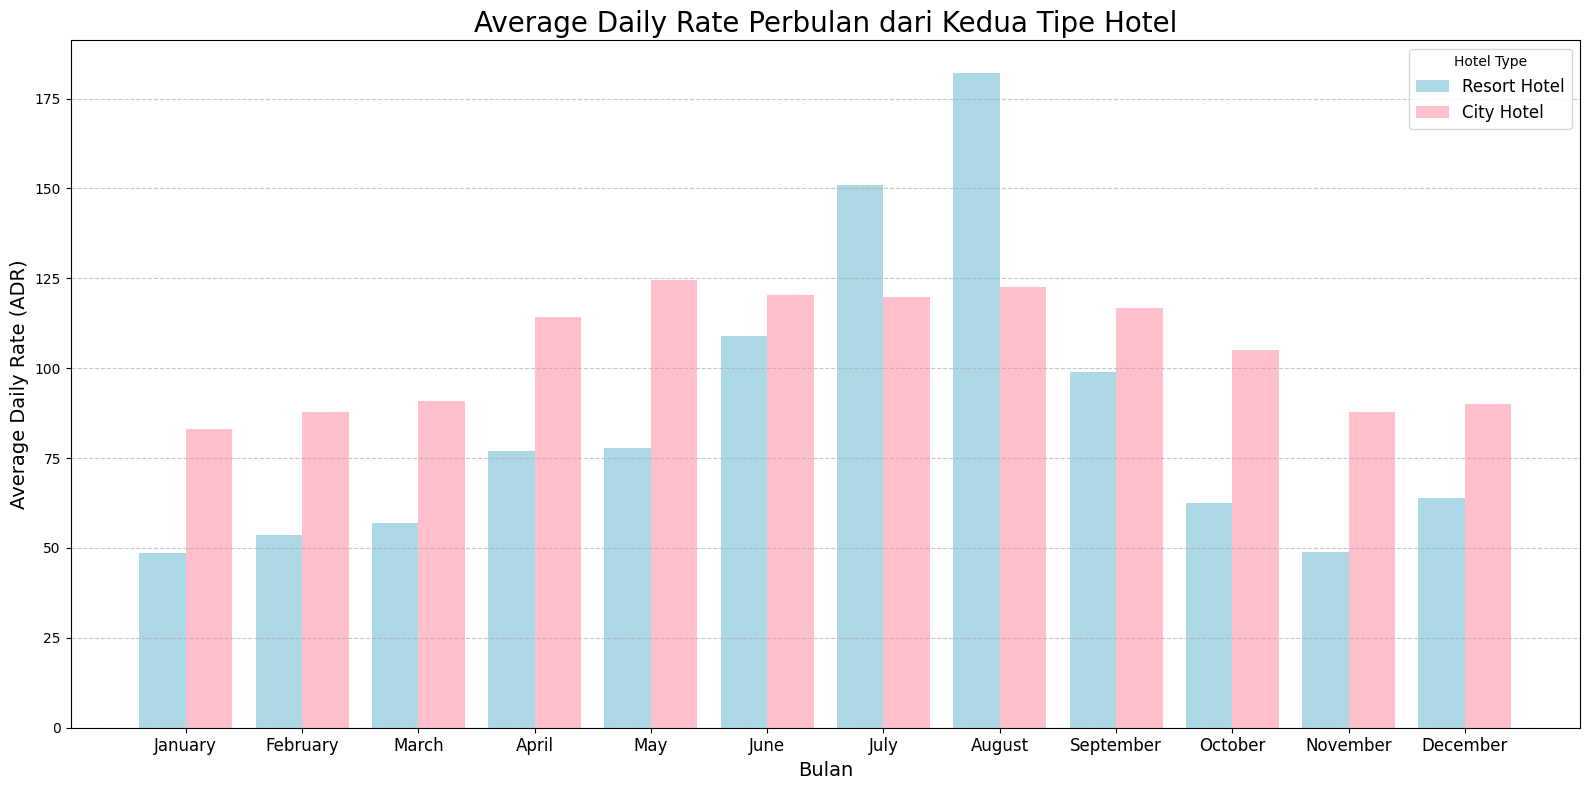

In [33]:
width=0.4
x = np.arange(len(months_order))

# Visualisasi
plt.figure(figsize=(16, 8))
plt.bar(x - width/2, resort_hotel['adr'], color='#ADD8E6', width=width, label='Resort Hotel')
plt.bar(x + width/2, city_hotel['adr'], color='#FFC0CB', width=width, label='City Hotel')
plt.title('Average Daily Rate Perbulan dari Kedua Tipe Hotel', size=20, color='black')
plt.xlabel('Bulan', size=14)
plt.ylabel('Average Daily Rate (ADR)', size=14)
plt.xticks(ticks=x, labels=months_order, fontsize=12)
plt.legend(title='Hotel Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Status Reservasi

In [34]:
# Menghitung value status pembatalan
canceled_reservation = df['is_canceled'].value_counts()
canceled_reservation

,count
is_canceled,
0,63371
1,24025


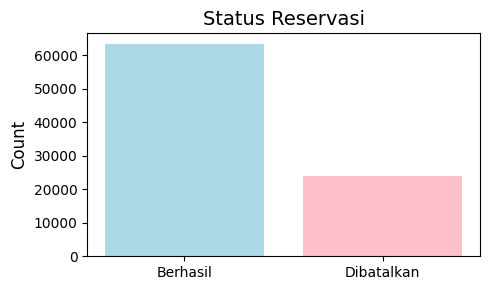

In [35]:
palette = ['#ADD8E6', '#FFC0CB']

# Visualisasi
plt.figure(figsize=(5, 3))
plt.title('Status Reservasi', fontsize=14, color='black')
plt.bar(['Berhasil', 'Dibatalkan'], df['is_canceled'].value_counts(), color=palette)
plt.ylabel('Count', fontsize=12, color='black')
plt.tight_layout()
plt.show()

## Status Reservasi Tiap Tipe Hotel

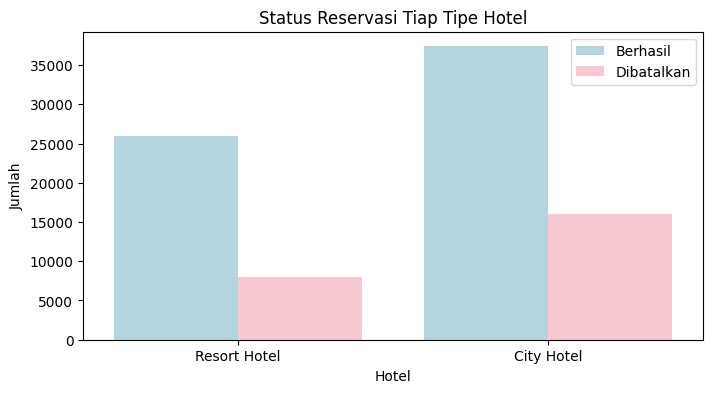

In [36]:
plt.figure(figsize=(8, 4))

# Visualisasi status pembatalan dengan menggunakan hotel sebagai x agar dapat menampilkan data berdasarkan masing - masing hotel
ax1 = sns.countplot(
    x='hotel',
    hue='is_canceled',
    data=df,
    palette=palette
    )

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

plt.title('Status Reservasi Tiap Tipe Hotel')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Jumlah', color='Black')
plt.legend(['Berhasil', 'Dibatalkan'])
plt.show()

## Status Reservasi Pertahun Tiap Tipe Hotel

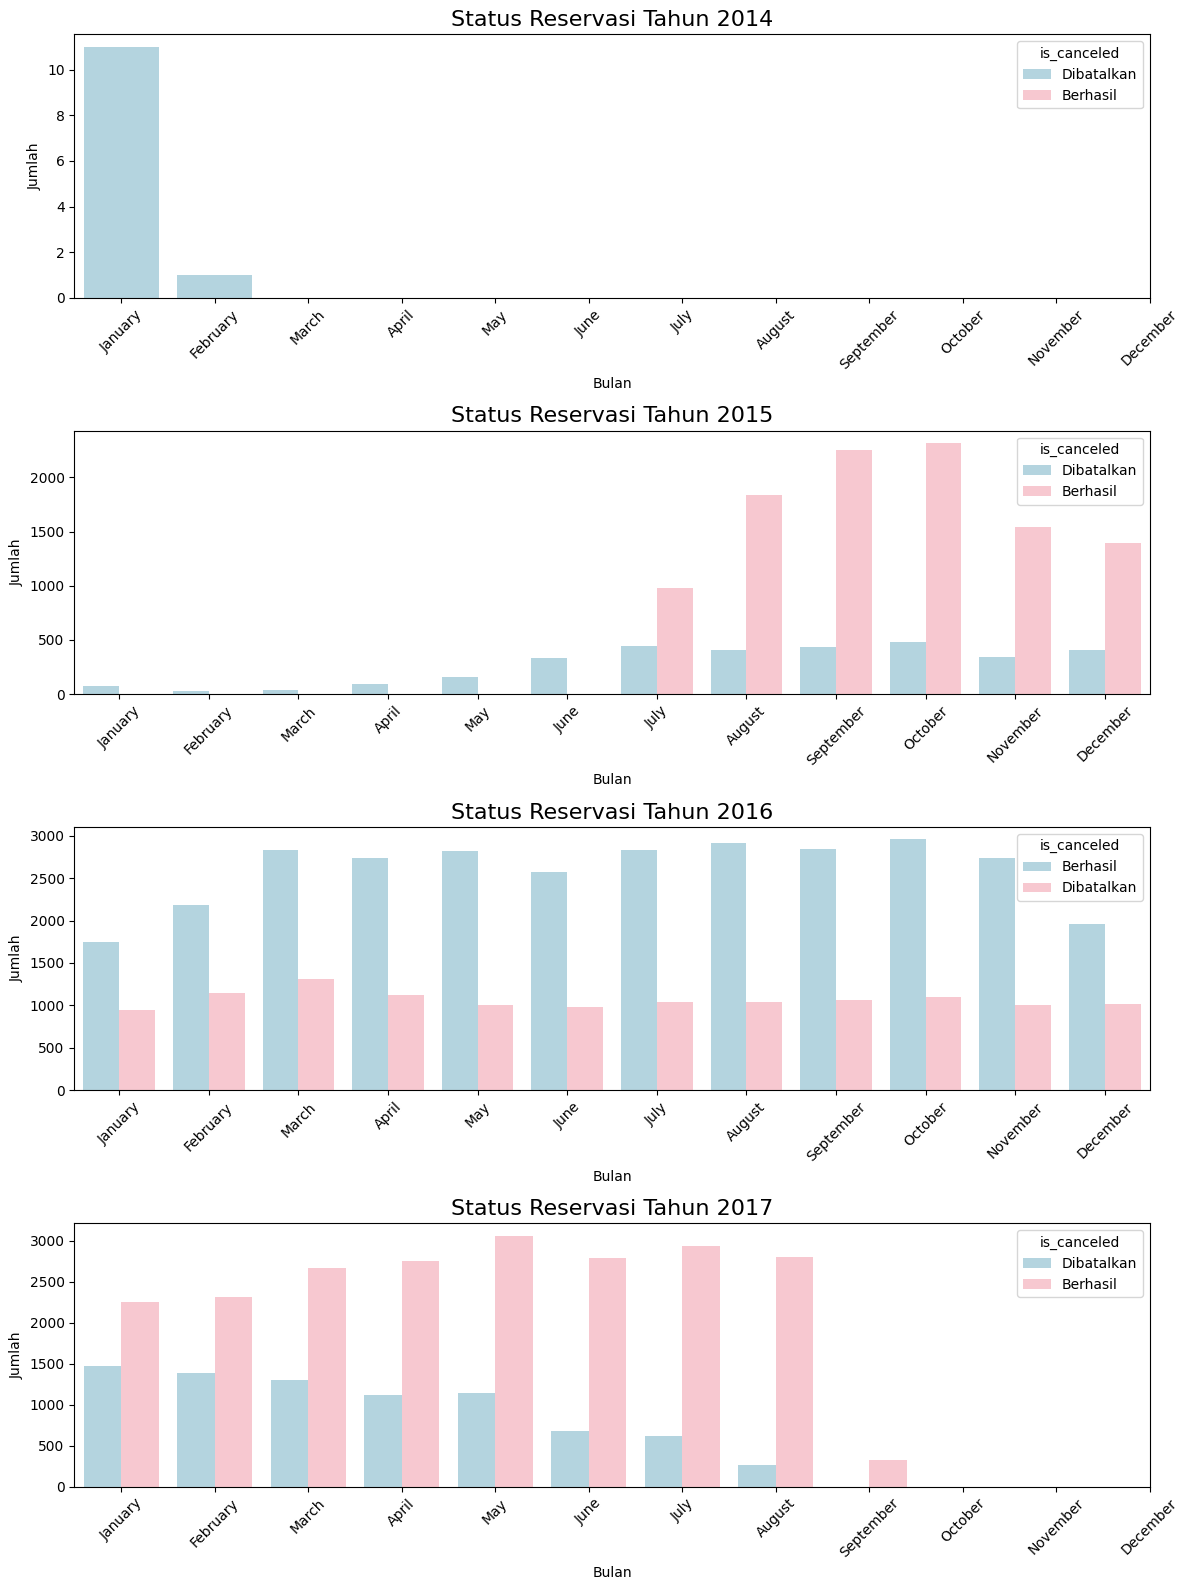

In [37]:
# Mengkonversi reservation status date menjadi tipe data datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Mengambil value month dan year
df['month'] = df['reservation_status_date'].dt.month
df['year'] = df['reservation_status_date'].dt.year

# Labelling agar dapat dibaca sebagai status pembatalan pada legend
labelling = df['is_canceled'].map({0: 'Berhasil', 1: 'Dibatalkan'})
df_grouped = df.groupby('year')
fig, axes = plt.subplots(nrows=len(df_grouped), ncols=1, figsize=(12, 4*len(df_grouped)))

# Visualisasi berdasarkan per tahun untuk perbulannya
for i, (year, group) in enumerate(df_grouped):
    ax = axes[i]
    sns.countplot(x='month', hue=labelling, data=group, palette=palette, ax=ax)
    ax.set_title(f'Status Reservasi Tahun {year}', size=16)
    x=range(0,12)
    ax.set_xticks(x)
    ax.set_xticklabels(months_order, rotation=45)
    ax.set_xlabel('Bulan')
    ax.set_ylabel('Jumlah')

plt.tight_layout()
plt.show()


## Banyaknya Pembatalan Reservasi Perbulan

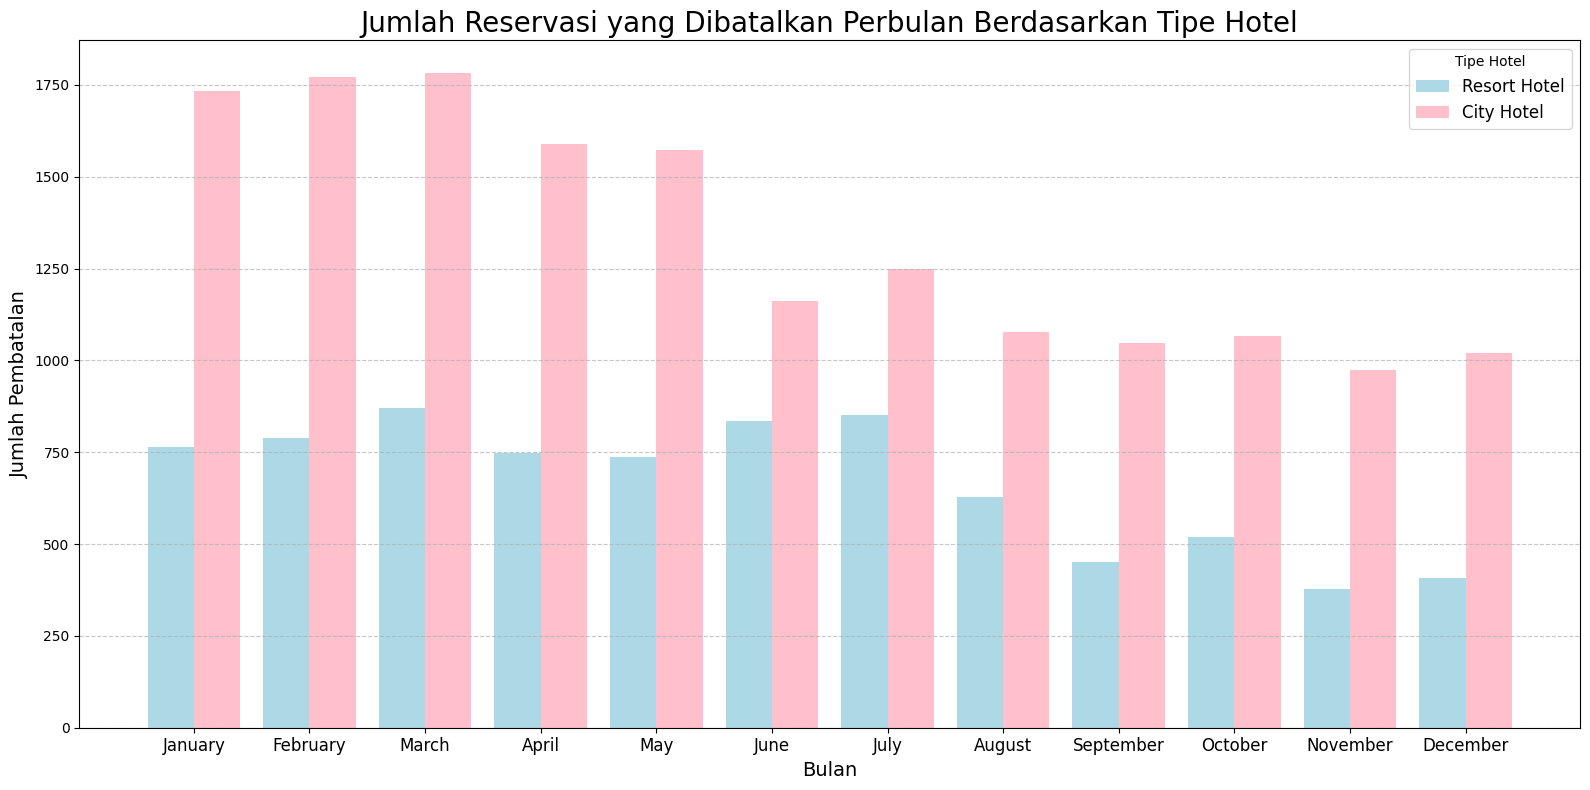

In [38]:
# Mengambil value status yang dibatalkan
canceled_df = df[df['is_canceled'] == 1]
canceled_df['reservation_status_date'] = pd.to_datetime(canceled_df['reservation_status_date'])
canceled_df['month'] = canceled_df['reservation_status_date'].dt.month
cancel_per_month = canceled_df.groupby(['month', 'hotel']).size().unstack(fill_value=0)

width = 0.4
x = np.arange(len(months_order))
plt.figure(figsize=(16, 8))
plt.bar(x - width/2, cancel_per_month['Resort Hotel'], color='#ADD8E6', width=width, label='Resort Hotel')
plt.bar(x + width/2, cancel_per_month['City Hotel'], color='#FFC0CB', width=width, label='City Hotel')
plt.title('Jumlah Reservasi yang Dibatalkan Perbulan Berdasarkan Tipe Hotel', size=20, color='black')
plt.xlabel('Bulan', size=14)
plt.ylabel('Jumlah Pembatalan', size=14)
plt.xticks(ticks=x, labels=months_order, fontsize=12)
plt.legend(title='Tipe Hotel', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Jumlah Customer Reservasi Ulang

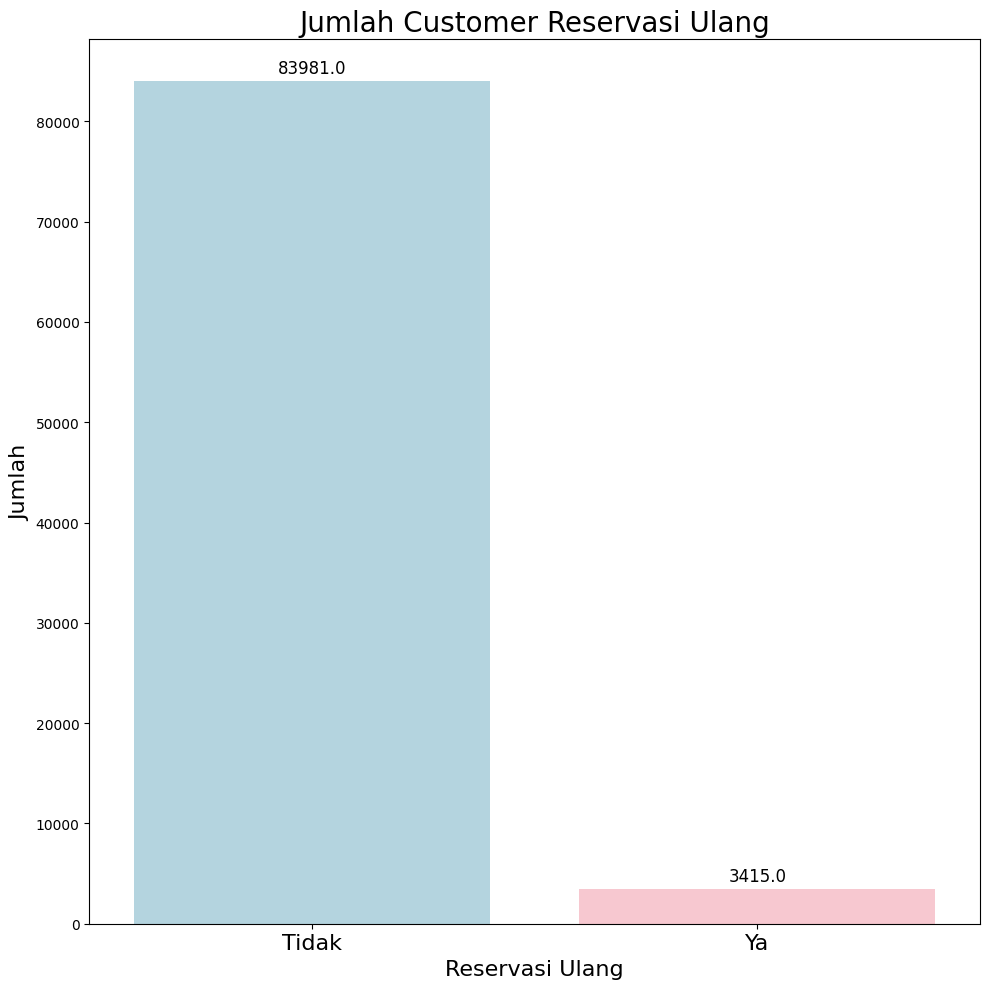

In [39]:
# Visualisasi
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df, x='is_repeated_guest', palette=palette)
ax.set_title('Jumlah Customer Reservasi Ulang', fontsize=20, color='black')
ax.set_xticklabels(['Tidak', 'Ya'], fontsize=16)
plt.xlabel('Reservasi Ulang', fontsize=16)
plt.ylabel('Jumlah', fontsize=16)
plt.yticks(fontsize=10)

# Menambahkan anotasi label pada bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

##  Pembatalan Reservasi Berdasarkan Tipe Customer

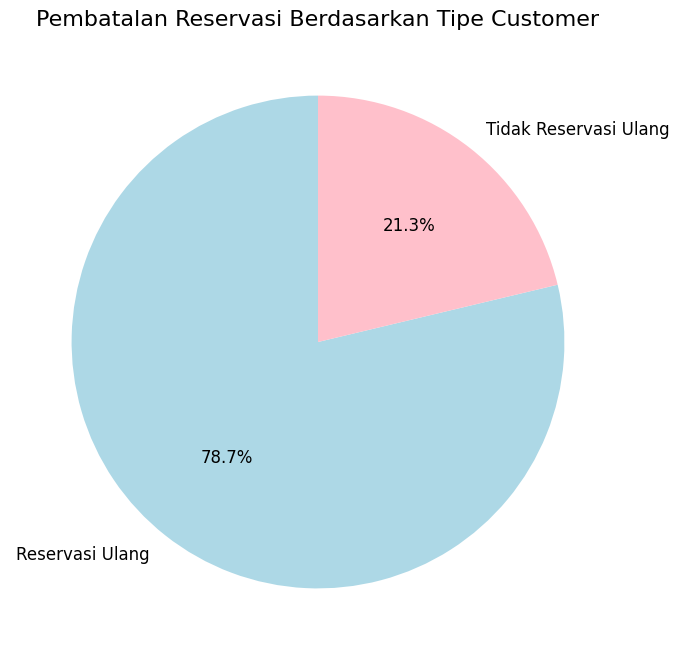

In [40]:
# Mengambil rata-rata repeated guest yang melakukan pembatalan reservasi
repeated_guest_cancellation = df.groupby('is_repeated_guest')['is_canceled'].mean()

labels = repeated_guest_cancellation.index.map({0: 'Reservasi Ulang', 1: 'Tidak Reservasi Ulang'})
values = repeated_guest_cancellation.values * 100
colors = palette

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
ax.set_title('Pembatalan Reservasi Berdasarkan Tipe Customer', fontsize=16)
plt.show()

## Top 10 Negara Asal Customer

In [41]:
# Memfilter data untuk hanya mengambil reservasi yang tidak dibatalkan (is_canceled = 0)
guest = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()

# Mengatur ulang nama kolom untuk membuat data lebih jelas
guest.columns = ['country', 'Number of guests']
guest


,country,Number of guests
0,PRT,18080
1,GBR,8448
2,FRA,7104
3,ESP,5390
4,DEU,4334
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


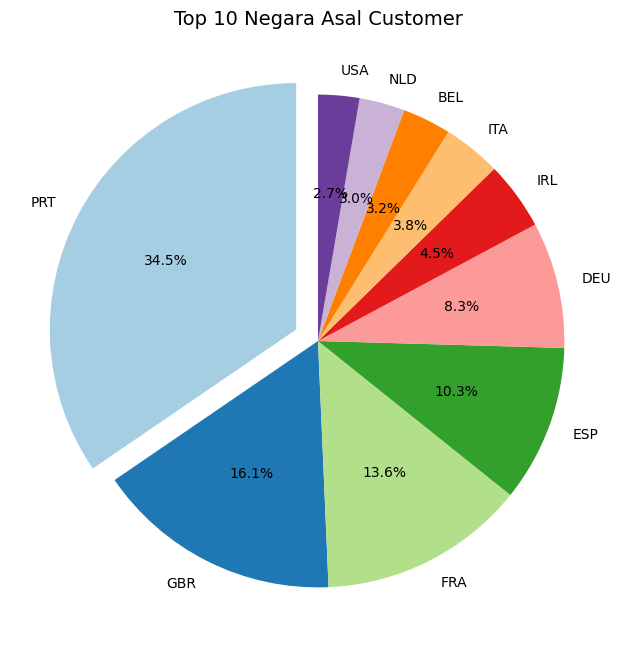

In [42]:
# Mengelompokkan data tamu berdasarkan negara dan menjumlahkan jumlah tamu dari setiap negara
top_countries = guest.groupby('country')['Number of guests'].sum()

# Mengurutkan negara berdasarkan jumlah tamu dari yang tertinggi, dan mengambil 10 besar
top_countries = top_countries.sort_values(ascending=False).head(10)

# Menyimpan nama negara (index) dan jumlah tamu (values) dari hasil pengelompokan
labels = top_countries.index
values = top_countries.values
max_country = labels[0]
explode_values = [0.1 if country == max_country else 0 for country in labels]


# Visualisasi
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10},
    explode=explode_values,
    colors=plt.cm.Paired.colors
)

ax.set_title("Top 10 Negara Asal Customer", fontsize=14)
plt.show()


## 10 Negara dengan Jumlah Pembatalan Tertinggi

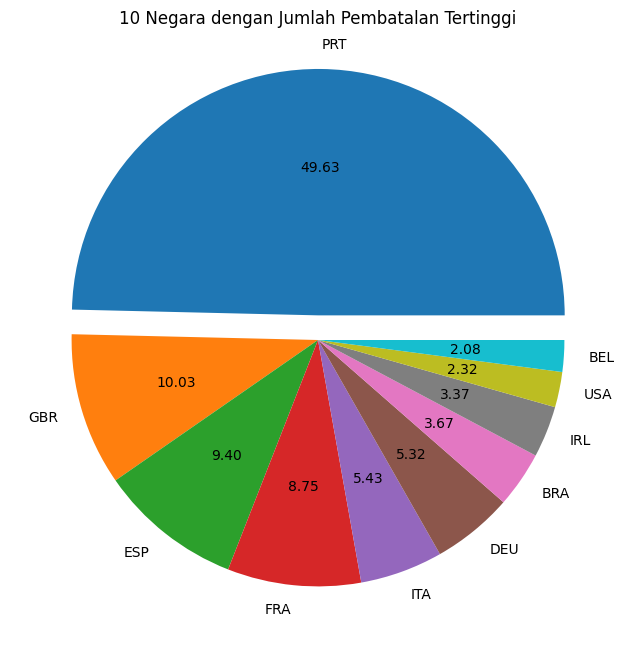

In [43]:
df = df_cleaned
cancelled_data = df[df['is_canceled'] == 1]
top_10_cancellation = cancelled_data['country'].value_counts()[:10]

most_cancelled_country = top_10_cancellation.idxmax()
explode = [0.1 if country == most_cancelled_country else 0 for country in top_10_cancellation.index]

plt.figure(figsize=(8,8))
plt.title('10 Negara dengan Jumlah Pembatalan Tertinggi',color="black")
plt.pie(top_10_cancellation, autopct ='%.2f', labels = top_10_cancellation.index, explode=explode)
plt.show()

# Data Modelling

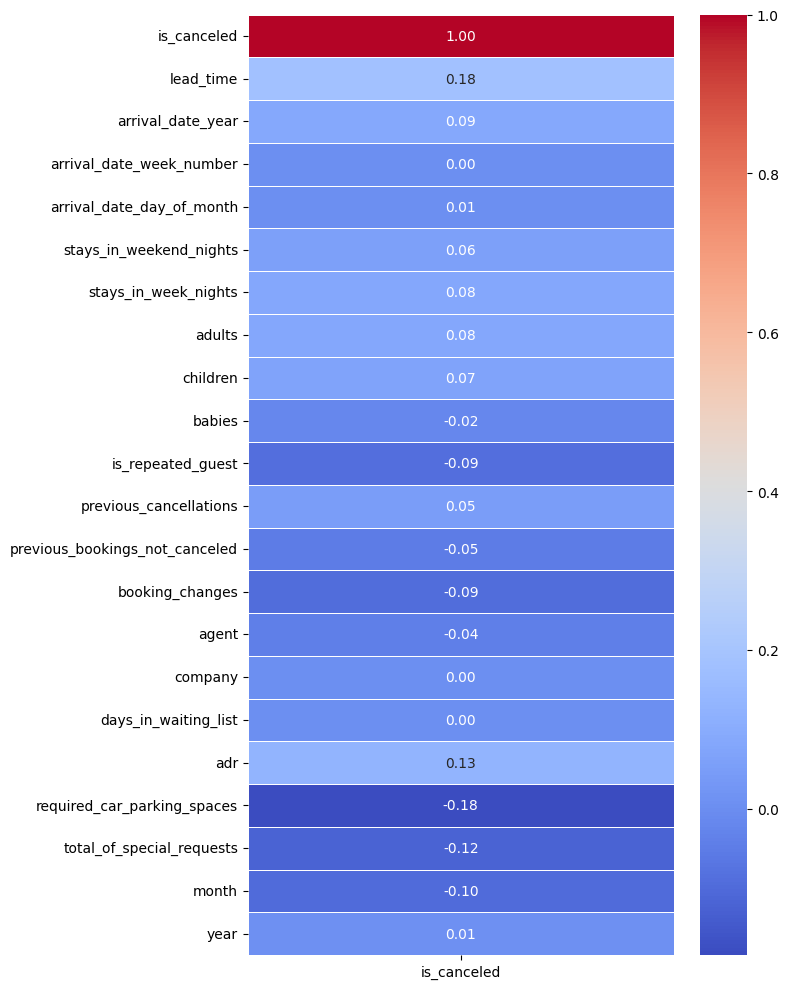

In [44]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_with_is_canceled = correlation_matrix[['is_canceled']]

plt.figure(figsize=(8, 10))
sns.heatmap(
    correlation_with_is_canceled,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True,
    linewidths=0.5
)
plt.tight_layout()
plt.show()


In [45]:
drop_col = ['previous_bookings_not_canceled', 'arrival_date_year','country', 'year','required_car_parking_spaces','assigned_room_type', 'total_of_special_requests', 'agent', 'reservation_status','month']
df.drop(drop_col, axis=1, inplace=True)

In [46]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,deposit_type,company,days_in_waiting_list,customer_type,adr,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,0,C,3,No Deposit,183.081384,0,Transient,0.0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,0,C,4,No Deposit,183.081384,0,Transient,0.0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,0,A,0,No Deposit,183.081384,0,Transient,75.0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,0,A,0,No Deposit,183.081384,0,Transient,75.0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,0,A,0,No Deposit,183.081384,0,Transient,98.0,2015-07-03


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hotel                      87396 non-null  object        
 1   is_canceled                87396 non-null  int64         
 2   lead_time                  87396 non-null  int64         
 3   arrival_date_month         87396 non-null  object        
 4   arrival_date_week_number   87396 non-null  int64         
 5   arrival_date_day_of_month  87396 non-null  int64         
 6   stays_in_weekend_nights    87396 non-null  int64         
 7   stays_in_week_nights       87396 non-null  int64         
 8   adults                     87396 non-null  int64         
 9   children                   87396 non-null  float64       
 10  babies                     87396 non-null  int64         
 11  meal                       87396 non-null  object        
 12  market_s

In [48]:
categorical_col = [col for col in df.columns if df[col].dtype in ['category', 'object', 'datetime']]
if 'reservation_status_date' in df.columns and 'reservation_status_date' not in categorical_col:
  categorical_col.append('reservation_status_date')
categorical_col

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [49]:
cat_df = df[categorical_col]
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   hotel                    87396 non-null  object        
 1   arrival_date_month       87396 non-null  object        
 2   meal                     87396 non-null  object        
 3   market_segment           87396 non-null  object        
 4   distribution_channel     87396 non-null  object        
 5   reserved_room_type       87396 non-null  object        
 6   deposit_type             87396 non-null  object        
 7   customer_type            87396 non-null  object        
 8   reservation_status_date  87396 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 8.7+ MB


In [50]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [51]:
cat_df.drop(['reservation_status_date', 'arrival_date_month'], axis = 1, inplace=True)

In [52]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [53]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [54]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB' : 2, 'SC': 3, 'Undefined': 4})
cat_df['market_segment']= cat_df['market_segment'].map({'Direct': 0, 'Corporate' : 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5,
                                                        'Undefined': 6, 'Aviation': 7})
cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4})
cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C':0, 'A':1, 'D':2, 'E':3, 'G':4, 'F':5, 'H':6, 'L':7, 'P':8, 'B':9})
cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
cat_df['customer_type'] = cat_df['customer_type'].map({'Transient':0, 'Contract':1, 'Transient-Party':2, 'Group':3})
cat_df['year']=cat_df['year'].map({2015:0, 2014:1, 2016:2, 2017:3})

In [55]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [56]:
num_df = df.drop(columns = categorical_col, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,company,days_in_waiting_list,adr
0,342,27,1,0,0,2,0.0,0,0,0,3,183.081384,0,0.00
1,737,27,1,0,0,2,0.0,0,0,0,4,183.081384,0,0.00
2,7,27,1,0,1,1,0.0,0,0,0,0,183.081384,0,75.00
3,13,27,1,0,1,1,0.0,0,0,0,0,183.081384,0,75.00
4,14,27,1,0,2,2,0.0,0,0,0,0,183.081384,0,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,183.081384,0,96.14
119386,102,35,31,2,5,3,0.0,0,0,0,0,183.081384,0,225.43
119387,34,35,31,2,5,2,0.0,0,0,0,0,183.081384,0,157.71
119388,109,35,31,2,5,2,0.0,0,0,0,0,183.081384,0,104.40


In [57]:
num_df.var()

,0
lead_time,7405.002696
arrival_date_week_number,186.993911
arrival_date_day_of_month,78.059813
stays_in_weekend_nights,1.064862
stays_in_week_nights,4.217207
adults,0.392503
children,0.207818
babies,0.012904
is_repeated_guest,0.037549
previous_cancellations,0.136268


In [58]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [59]:
num_df.var()

,0
lead_time,2.655690
arrival_date_week_number,0.457324
arrival_date_day_of_month,0.513503
stays_in_weekend_nights,1.064862
stays_in_week_nights,4.217207
adults,0.392503
children,0.207818
babies,0.012904
is_repeated_guest,0.037549
previous_cancellations,0.136268


In [60]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [61]:
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,company,days_in_waiting_list,adr
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,3,5.215378,0,0.000000
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,4,5.215378,0,0.000000
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.215378,0,4.330733
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.215378,0,4.330733
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.215378,0,4.595120


In [62]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [63]:
X.shape, y.shape

((87396, 24), (87396,))

### Splitting Data

Membagi data dengan rasio 0.7

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

### CatBoost

In [65]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.492955
0:	learn: 0.5103665	total: 67ms	remaining: 6.63s
1:	learn: 0.4682609	total: 84.3ms	remaining: 4.13s
2:	learn: 0.3986531	total: 103ms	remaining: 3.33s
3:	learn: 0.3575722	total: 130ms	remaining: 3.11s
4:	learn: 0.3269254	total: 157ms	remaining: 2.98s
5:	learn: 0.3088847	total: 216ms	remaining: 3.38s
6:	learn: 0.2889020	total: 241ms	remaining: 3.21s
7:	learn: 0.2296420	total: 269ms	remaining: 3.1s
8:	learn: 0.2136985	total: 294ms	remaining: 2.97s
9:	learn: 0.1954379	total: 324ms	remaining: 2.91s
10:	learn: 0.1910263	total: 352ms	remaining: 2.84s
11:	learn: 0.1776316	total: 381ms	remaining: 2.79s
12:	learn: 0.1675949	total: 417ms	remaining: 2.79s
13:	learn: 0.1494852	total: 483ms	remaining: 2.97s
14:	learn: 0.1403794	total: 500ms	remaining: 2.83s
15:	learn: 0.1305562	total: 519ms	remaining: 2.72s
16:	learn: 0.1288395	total: 537ms	remaining: 2.62s
17:	learn: 0.1222946	total: 555ms	remaining: 2.53s
18:	learn: 0.1148420	total: 572ms	remaining: 2.44s
19:	learn: 0

In [66]:
print(f"Accuracy Score of CatBoost Classifier is : {acc_cat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of CatBoost Classifier is : 0.9951561844463939
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19104
           1       1.00      0.98      0.99      7115

    accuracy                           1.00     26219
   macro avg       1.00      0.99      0.99     26219
weighted avg       1.00      1.00      1.00     26219



### XGBoost

In [67]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

In [68]:
print(f"Accuracy Score of XGBoost Classifier is : {acc_xgb}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XGBoost Classifier is : 0.9815019642244174
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19104
           1       1.00      0.93      0.96      7115

    accuracy                           0.98     26219
   macro avg       0.99      0.97      0.98     26219
weighted avg       0.98      0.98      0.98     26219



### KNN

In [69]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

In [70]:
print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8544185514321675
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     19104
           1       0.88      0.54      0.67      7115

    accuracy                           0.85     26219
   macro avg       0.86      0.76      0.79     26219
weighted avg       0.86      0.85      0.84     26219



## Model Comparasion

In [71]:
models = pd.DataFrame({'Model' : ['XGBoost', 'CatBoost', 'KNN'],
                      'Score': [acc_xgb, acc_cat, acc_knn]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,CatBoost,0.995156
0,XGBoost,0.981502
2,KNN,0.854419


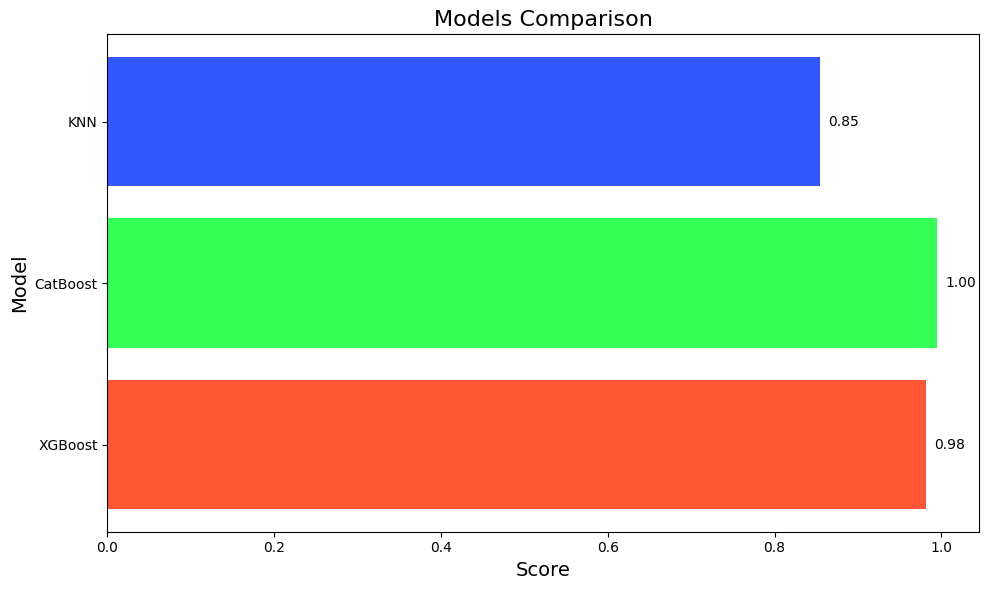

In [74]:
plt.figure(figsize=(10, 6))
colors = ['#FF5733', '#33FF57', '#3357FF']

bars = plt.barh(models['Model'], models['Score'], color=colors)
plt.title('Models Comparison', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Model', fontsize=14)

# Menambahkan anotasi nilai pada setiap bar
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=10)


plt.tight_layout()
plt.show()

Analisis model machine learning untuk memprediksi pembatalan reservasi hotel menunjukkan bahwa model CatBoost memiliki performa terbaik dengan akurasi tertinggi dibandingkan dengan XGBoost dan KNN. Hal ini menunjukkan bahwa CatBoost lebih mampu mempelajari pola kompleks dalam data dan menghasilkan prediksi yang lebih akurat. Meskipun demikian, ketiga model menunjukkan performa yang baik dalam mengklasifikasikan status reservasi, yang mengindikasikan bahwa fitur-fitur yang dipilih dan pra-pemrosesan data yang dilakukan cukup efektif. Hasil analisis ini dapat digunakan untuk membangun sistem prediksi yang handal dan membantu hotel dalam mengoptimalkan strategi pengelolaan reservasi untuk mengurangi tingkat pembatalan.

In [75]:
!pip freeze > requirements.txt